# Sampling from a probability distribution

Consider a probability density $f(x)$, for which no closed-form expression is available. Instead, an algorithm is available that will evaluate $f(x)$ for any value of $x$, called

    f_blind

This function is made available in Python using:

    from f_blind import f_blind

Then, $f(x)$ can be evaluated as 

    x=5
    f_blind(x)

	    0.03910426939754559.


Additional information is that $f(x)=0$ for $x \le 0$ and $x \ge 100$, and $\max(f(x)) \le 1$.


## Rejection sampling

Use the rejection sampler
to sample $f(x)$, to obtain $x^*_{rejection}$. 

How many iterations of the rejection sampler are needed to obtain 1000 \textit{independent} realizations of $f(x)$?. 
Consider plotting the autocorrelation of  $x^*_{rejection}$.

Run two independent rejection samplers, and compare the resulting 1D distribution (histogram). Is the same distribution sampled in each case? 

If somehow you could know that the maximum value of $f(x)$ is $0.1$, could you use this information to make the rejection sampler more efficient (as in the number of iterations needed to obtain 1000 realizations)?

What will happen if you assume that $\max(f(x))=0.0001$? Which distribution will you sample?

Run the rejection sampler using different annealing temperatures: $T=[0.001, 0.1, 1, 10]$. Compare and discuss the histogram obtained using each annealing temperature.


Compute $P(x>10)$ using the rejection sampler. How many iterations are needed to obtain a given accuracy?



In [1]:
import matplotlib.pyplot  as plt
import numpy              as np

from f_blind import f_blind

def draw_fig():

    # Cpomute histogram
    [h,hx]   = np.histogram(m_acc,np.arange(0,51,1))
    hx = (hx[1:] + hx[:-1])/2
    hsum     = np.sum(h*(hx[1]-hx[0]))
    hh       = np.divide(h,float(hsum))
    
    f, ax = plt.subplots(1,2)
    ax[0].bar(hx,hh)
    #ax[0].set_xlim([0, 100])
    ax[0].set_ylim([0, 0.07])
    ax[0].set_title('Histogram of accepted values')
    ax[0].set_xlabel('m')
    ax[0].set_ylabel('f(m), Frequency')

    ax[1].plot(m_acc,'.')
    #ax[1].set_xlim([0, 1500])
    ax[1].set_ylim([0, 100])
    ax[1].set_title('Appectance frequency = %6.2f %%'%(100*float(i_acc)/float(i_test)))
    ax[1].set_xlabel('Iteration number')
    ax[1].set_ylabel('m^*')
    f.tight_layout()



Accepted: 00001,   5.45,   0.04,   0.39
Accepted: 00002,  54.21,   0.06,   0.56
Accepted: 00003,  53.60,   0.06,   0.62
Accepted: 00004,  11.67,   0.03,   0.27
Accepted: 00005,   2.81,   0.04,   0.40
Accepted: 00006,  11.59,   0.03,   0.28
Accepted: 00007,   9.17,   0.03,   0.33
Accepted: 00008,   0.58,   0.04,   0.39
Accepted: 00009,   7.79,   0.04,   0.36
Accepted: 00010,  45.88,   0.06,   0.57
Accepted: 00011,  40.82,   0.01,   0.15
Accepted: 00012,   3.40,   0.04,   0.40
Accepted: 00013,  46.22,   0.06,   0.60
Accepted: 00014,   0.57,   0.04,   0.39
Accepted: 00015,  24.55,   0.00,   0.04
Accepted: 00016,  19.87,   0.01,   0.10
Accepted: 00017,  21.49,   0.01,   0.07
Accepted: 00018,  16.58,   0.02,   0.16
Accepted: 00019,  47.44,   0.07,   0.70
Accepted: 00020,  52.25,   0.07,   0.72
Accepted: 00021,  41.76,   0.02,   0.21
Accepted: 00022,  14.14,   0.02,   0.21
Accepted: 00023,  48.66,   0.08,   0.77
Accepted: 00024,  54.00,   0.06,   0.58
Accepted: 00025,   5.95,   0.04,   0.38


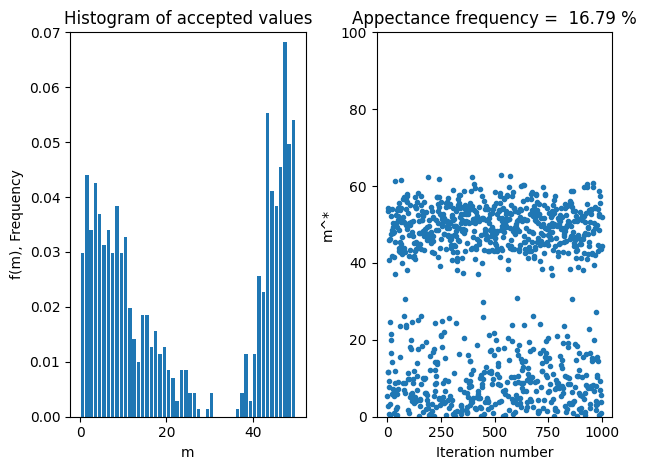

In [2]:

f_max   = 0.1

m_acc   = []
i_acc   = 0
i_test  = 0
N_acc   = 1000


#for i in range(N):
while i_acc < N_acc:
   i_test   = i_test+1
   m_pro    = np.random.rand()*100
   f        = f_blind(m_pro)
   P_acc    = f/f_max
   
   # accept with probability P_acc
   if np.random.rand() < P_acc:
       i_acc = i_acc+1
       m_acc.append(m_pro)
       print('Accepted: %05d, %6.2f, %6.2f, %6.2f'%(i_acc,m_pro,f,P_acc))
   else:
        pass
   
   #if np.mod(i+1,np.ceil(N/4))==0 and i > 0:
   #     draw_fig() 

draw_fig()    

### Compute P(x>10) using the rejection sampler. How many iterations are needed to obtain a given accuracy?

In [3]:
# compute the fraction of accepted values with a value of m above 10
m_acc = np.array(m_acc)
N = float(len(m_acc[m_acc>10]))
P_10 = N/N_acc
print('Fraction of accepted values with m > 10 = %6.2f %%'%(100*P_10))


Fraction of accepted values with m > 10 =  75.30 %


## Sampling $f(x)$ using the Metropolis algorithm

Use the Metropolis algorithm %, using any choice of proposal distribution $g(x)$, 
to sample $f(x)$, to obtain $x^*_{Metropolis}$. 

How many iterations of the Metropolis-Hastings algorithm is needed to obtain 1000 \textit{independent} realizations of the posterior?  [Compute and analyze the autocorrelation of $x^*_{Metropolis}$]

Run two Metropolis-Hastings samplers, and compare the resulting 1D distribution (histogram). Compare also to the distribution obtained using the rejection sampler. 

Plot the mean as a function of realization/iteration number for both $x^*_{rejection}$ and $x^*_{Metropolis}$. How do the two curves compare? If any differences are noticed, how can these be explained?

Compute $P(x>10)$ using the Metropolis-Hastings algorithm. How many iterations are needed to obtain a given accuracy?

Fraction of accepted models =  43.31 %
Fraction of accepted values with m > 10 =  78.29 %


Text(0, 0.5, 'm^*')

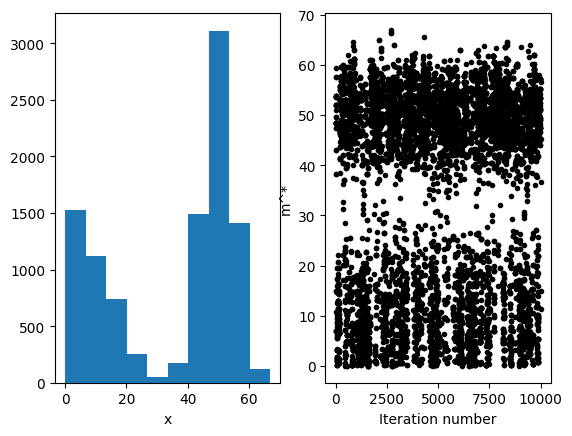

In [4]:

i_acc   = 0
N_ite   = 10000
m_post   = np.zeros(N_ite)
step = 15.0

m_cur = np.random.rand()*100
f_cur = f_blind(m_cur)

for i in range(N_ite):
    # Propose a new model 
    m_pro    = m_cur + np.random.randn()*step
    f_pro = f_blind(m_pro)


    P_acc    = f_pro/f_cur

    # accept with probability P_acc
    if np.random.rand() < P_acc:
        # Accept, and move to the new model
        i_acc = i_acc+1
        m_cur = m_pro
        f_cur = f_pro
        # m_cur 
        #print('Accepted: %05d, %6.2f, %6.2f, %6.2f'%(i_acc,m_pro,f,P_acc))
    else:
        # Reject, and stay at the current model
        pass
    m_post[i] = m_cur

print('Fraction of accepted models = %6.2f %%'%(100*float(i_acc)/float(N_ite)))
# compute the fraction of accepted values with a value of m above 10
N = float(len(m_post[m_post>10]))
P_10_metropolis = N/N_ite
print('Fraction of accepted values with m > 10 = %6.2f %%'%(100*P_10_metropolis))

# Plot the histogram of the accepted values
plt.subplot(1,2,1)
plt.hist(m_post)
plt.xlabel('x')
plt.subplot(1,2,2)
plt.plot(m_post,'k.')
plt.xlabel('Iteration number')
plt.ylabel('m^*')